Welcome to Bio 1B Notebook on Phylogeny Part B on the Molecular Estimation of the Phylogeny of Primates Using the Epsilon Hemoglobin Gene! In this notebook we will be going over the phylogeny of primates, utilizing the hemoglobin gene and performing analysis through data science principles. 

## Learning Outcomes

- Understanding BioPython

- Understanding comprehensively the process of parsimony analysis

- Selecting an outgroup and display it on a tree

- Understand the phylogeny of primates & the interdisciplinary connection with data science

## Reading in the Data

We need to import our libraries first.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

We need to also install biopython. Biopython is a helpful set of Python tools intended for computational biology and bioinformatics. You can learn and explore more here.

In [33]:
! pip install biopython

In [34]:
import Bio

In [35]:
from Bio import Phylo

We will begin by importing SeqIO, which allows us to parse through fasta files. Fasta files are text-based format for representing either nucleotide sequences or amino acid (protein) sequences, used extensively in data analysis in the realm of biology. Run the following cell, and we can see different types of primates paired with their individual DNA amino acid sequence.

In [36]:
from Bio import SeqIO
for seq_record in SeqIO.parse("DataSets/Primate_Epsilon.fas", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

Galago
Seq('CTTTGACCAATGACTTCTAACTACCACGGAGAACAAGGGGCTAGAACTTCAGCA...TCA')
1620
Lemur
Seq('CCTTGACCAATGACTTCTAACTACCACGGAGAGCAAGGGGCCAGAACATCAGCA...TCA')
1637
Goat
Seq('CCTTGACCAATGACTTCAAAGGACAAGGGGGAGCAAGGGGGCAGAAGTTCAGCA...TCA')
1608
Tarsier
Seq('ATCACTAGCAAGTTGCCAGACCTGACATCATGGTGCATCTTACTGCTGAAGAAA...TCA')
1510
Marmoset
Seq('CCTTGACCAATGACTTTTAAGTACCATGGAGAATAGGGAGCAGAACTTCAGCAG...TCA')
1507
Chimpanzee
Seq('CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAGAACTTCGGCA...TCA')
1660
Gorilla
Seq('CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAGAACTTCGGCA...TCA')
1662
Gibbon
Seq('CCTTGACCAATGACTTTTAAGTACCACGGAGAACAGGGGGCCAGAACTTCGGCA...TCA')
1672
Human
Seq('CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAGAACTTCGGCA...TCA')
1659
Orangutan
Seq('CCTTGACCAATGACTTTTAAATACCATGGAGAACAGGGGGCCAGAACTTCGGCA...TCA')
1667


Run the next cell to check out the different primates represented in the 

In [37]:
from Bio import SeqIO

for record in SeqIO.parse("DataSets/Primate_Epsilon.fas", "fasta"):
    print(record.id)

Galago
Lemur
Goat
Tarsier
Marmoset
Chimpanzee
Gorilla
Gibbon
Human
Orangutan


Next we'll finally keep our values for each primate's DNA sequence within a python dictionary. A python dictionary maps two distinct values, a key and a value pair, together. This allows for one to easily link two separate facets together, like the name of a primate and the primate's specific sequence record! Run the cell and check it out.

In [38]:
record_dict = SeqIO.to_dict(SeqIO.parse("DataSets/Primate_Epsilon.fas", "fasta"))
record_dict

{'Galago': SeqRecord(seq=Seq('CTTTGACCAATGACTTCTAACTACCACGGAGAACAAGGGGCTAGAACTTCAGCA...TCA'), id='Galago', name='Galago', description='Galago', dbxrefs=[]),
 'Lemur': SeqRecord(seq=Seq('CCTTGACCAATGACTTCTAACTACCACGGAGAGCAAGGGGCCAGAACATCAGCA...TCA'), id='Lemur', name='Lemur', description='Lemur', dbxrefs=[]),
 'Goat': SeqRecord(seq=Seq('CCTTGACCAATGACTTCAAAGGACAAGGGGGAGCAAGGGGGCAGAAGTTCAGCA...TCA'), id='Goat', name='Goat', description='Goat', dbxrefs=[]),
 'Tarsier': SeqRecord(seq=Seq('ATCACTAGCAAGTTGCCAGACCTGACATCATGGTGCATCTTACTGCTGAAGAAA...TCA'), id='Tarsier', name='Tarsier', description='Tarsier', dbxrefs=[]),
 'Marmoset': SeqRecord(seq=Seq('CCTTGACCAATGACTTTTAAGTACCATGGAGAATAGGGAGCAGAACTTCAGCAG...TCA'), id='Marmoset', name='Marmoset', description='Marmoset', dbxrefs=[]),
 'Chimpanzee': SeqRecord(seq=Seq('CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAGAACTTCGGCA...TCA'), id='Chimpanzee', name='Chimpanzee', description='Chimpanzee', dbxrefs=[]),
 'Gorilla': SeqRecord(seq=Seq('CCTTGACCAAT

In your own words (1-2 sentences), why might it be important for biologists to have the biopython library for programming? How is it helpful for biologists in this scenario of DNA sequences?

Your answer here

# Aligning Data with ClustalQ

In [63]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import *



from Bio import AlignIO
from Bio import SeqIO
from Bio import Seq
import os

In [40]:
input_file = "DataSets/Primate_Epsilon.fas"
records = SeqIO.parse(input_file, 'fasta')
records = list(records) # make a copy, otherwise our generator
                        # is exhausted after calculating maxlen
maxlen = max(len(record.seq) for record in records)

# pad sequences so that they all have the same length
for record in records:
    if len(record.seq) != maxlen:
        sequence = str(record.seq).ljust(maxlen, '-')
        record.seq = Seq.Seq(sequence)
assert all(len(record.seq) == maxlen for record in records)

# write to temporary file and do alignment
output_file = '{}_padded.fasta'.format(os.path.splitext(input_file)[0])
with open(output_file, 'w') as f:
    SeqIO.write(records, f, 'fasta')
alignment = AlignIO.read(output_file, "fasta")
print(alignment)

Alignment with 10 rows and 1672 columns
CTTTGACCAATGACTTCTAACTACCACGGAGAACAAGGGGCTAG...--- Galago
CCTTGACCAATGACTTCTAACTACCACGGAGAGCAAGGGGCCAG...--- Lemur
CCTTGACCAATGACTTCAAAGGACAAGGGGGAGCAAGGGGGCAG...--- Goat
ATCACTAGCAAGTTGCCAGACCTGACATCATGGTGCATCTTACT...--- Tarsier
CCTTGACCAATGACTTTTAAGTACCATGGAGAATAGGGAGCAGA...--- Marmoset
CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAG...--- Chimpanzee
CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAG...--- Gorilla
CCTTGACCAATGACTTTTAAGTACCACGGAGAACAGGGGGCCAG...TCA Gibbon
CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAG...--- Human
CCTTGACCAATGACTTTTAAATACCATGGAGAACAGGGGGCCAG...--- Orangutan


In [41]:
# Read the sequences and align
align = AlignIO.read("DataSets/Primate_Epsilon_padded.fasta", "fasta")
print(align)

Alignment with 10 rows and 1672 columns
CTTTGACCAATGACTTCTAACTACCACGGAGAACAAGGGGCTAG...--- Galago
CCTTGACCAATGACTTCTAACTACCACGGAGAGCAAGGGGCCAG...--- Lemur
CCTTGACCAATGACTTCAAAGGACAAGGGGGAGCAAGGGGGCAG...--- Goat
ATCACTAGCAAGTTGCCAGACCTGACATCATGGTGCATCTTACT...--- Tarsier
CCTTGACCAATGACTTTTAAGTACCATGGAGAATAGGGAGCAGA...--- Marmoset
CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAG...--- Chimpanzee
CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAG...--- Gorilla
CCTTGACCAATGACTTTTAAGTACCACGGAGAACAGGGGGCCAG...TCA Gibbon
CCTTGACCAATGACTTTTAAGTACCATGGAGAACAGGGGGCCAG...--- Human
CCTTGACCAATGACTTTTAAATACCATGGAGAACAGGGGGCCAG...--- Orangutan


In [42]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
print(distMatrix)

Galago  0.000000
Lemur   0.577153    0.000000
Goat    0.637560    0.644139    0.000000
Tarsier 0.736244    0.755981    0.724282    0.000000
Marmoset    0.717703    0.732656    0.697368    0.681220    0.000000
Chimpanzee  0.605263    0.609450    0.660287    0.770933    0.708134    0.000000
Gorilla 0.578349    0.601077    0.658493    0.765550    0.707536    0.294258    0.000000
Gibbon  0.616029    0.620813    0.666866    0.777512    0.727871    0.324163    0.322967    0.000000
Human   0.603469    0.556818    0.671053    0.773325    0.723086    0.285885    0.291866    0.331340    0.000000
Orangutan   0.642943    0.608254    0.654904    0.785885    0.724282    0.456938    0.464115    0.452153    0.453349    0.000000
    Galago  Lemur   Goat    Tarsier Marmoset    Chimpanzee  Gorilla Gibbon  Human   Orangutan


In [43]:
# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()# Construct the phlyogenetic tree using UPGMA algorithm
UGMATree = constructor.upgma(distMatrix)# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

In [44]:
UGMATree.root_with_outgroup({"name":"Goat"})
#NJTree.root_with_outgroup

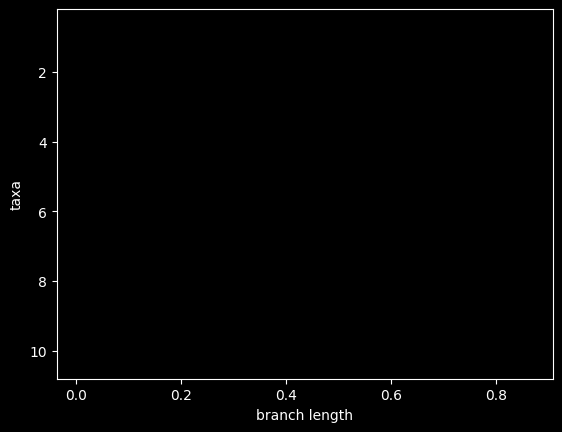

                                    ______________________________ Marmoset
                               ____|
                              |    |______________________________ Tarsier
                              |
                              |          ___________________ Orangutan
  ____________________________|   ______|
 |                            |  |      |      _____________ Gibbon
 |                            |  |      |_____|
 |                            |  |            | ____________ Gorilla
 |                            |  |            ||
 |                            |__|             | ___________ Human
_|                               |             ||
 |                               |              |___________ Chimpanzee
 |                               |
 |                               |  ________________________ Lemur
 |                               |_|
 |                                 |________________________ Galago
 |
 | Goat



In [45]:
# Draw the phlyogenetic tree
Phylo.draw(UGMATree)# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(UGMATree)

In [46]:
from Bio import Phylo
from Bio.Phylo.Consensus import *

In [47]:
msa = AlignIO.read("DataSets/Primate_Epsilon_padded.fasta", "fasta")
msas = bootstrap(msa, 10)

In [48]:
calculator = DistanceCalculator("blosum62")
constructor = DistanceTreeConstructor(calculator)
trees = bootstrap_trees(msa, 10, constructor)


In [50]:
consensus_tree = bootstrap_consensus(msa, 100, constructor, majority_consensus)


In [51]:
clean_tree = consensus_tree

In [69]:
ParsimonyScorer(distMatrix).get_score(consensus_tree, align)

ValueError: 'C' is not in list

In [57]:
consensus_tree.root_with_outgroup({"name":"Goat"})

In [62]:
#GET SCORE OF CONSENSUS TREE
Bio.Phylo.score(clean_tree)

AttributeError: module 'Bio.Phylo' has no attribute 'score'

In [60]:
Phylo.draw_ascii(consensus_tree)

 , Goat
 |
 |                             ___________________________________ Tarsier
_|                           _|
 |                          | |_____________________________ Marmoset
 |                          |
 |__________________________|    _______________________ Lemur
                            |  ,|
                            |  ||________________________ Galago
                            |__|
                               |      ___________________ Orangutan
                               |_____|
                                     |     _____________ Gibbon
                                     |____|
                                          | ____________ Gorilla
                                          ||
                                           | ___________ Chimpanzee
                                           ||
                                            |___________ Human



## parsimony analysis

## Tree Display

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f76ca8c-bac0-4258-8219-91851f8426bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>